In [359]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil


# Data extraction

In [360]:
cardio = pd.read_csv('/Users/surajkwork/Documents/Projects/runkeeper_data_analysis/data/cardioActivities.csv')

In [361]:
cardio.head()

,Activity Id,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,2024-12-10 18:00:57,Running,NaN,2.87,36:22,12:41,4.73,186.0,21,NaN,NaN,NaN,2024-12-10-180057.gpx
1,becc4798-4db0-4a19-bf61-c32ebd5650f2,2024-12-01 15:23:10,Running,NaN,7.97,1:16:59,9:40,6.21,559.0,41,NaN,NaN,NaN,2024-12-01-152310.gpx
2,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,2024-11-17 16:04:34,Running,NaN,3.85,38:12,9:56,6.04,285.0,15,NaN,NaN,NaN,2024-11-17-160434.gpx
3,98b4b003-9d1c-4743-bd88-b19766453fdd,2024-11-02 16:15:58,Running,NaN,7.86,1:10:45,9:00,6.67,568.0,42,NaN,NaN,NaN,2024-11-02-161558.gpx
4,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,2024-10-26 17:14:17,Running,NaN,7.95,1:07:10,8:27,7.10,580.0,41,NaN,NaN,NaN,2024-10-26-171417.gpx


In [362]:
steps = pd.read_csv('/Users/surajkwork/Documents/Projects/runkeeper_data_analysis/data/steps.csv')
steps.head()

,Activity Id,Timestamp,Steps
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,8.0,3
1,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,11.0,9
2,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,16.0,12
3,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,19.0,2
4,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,21.0,2


In [363]:
cardio.shape, steps.shape

((361, 14), (540280, 3))

In [364]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               361 non-null    object 
 1   Date                      361 non-null    object 
 2   Type                      361 non-null    object 
 3   Route Name                0 non-null      float64
 4   Distance (km)             361 non-null    float64
 5   Duration                  361 non-null    object 
 6   Average Pace              361 non-null    object 
 7   Average Speed (km/h)      361 non-null    float64
 8   Calories Burned           361 non-null    float64
 9   Climb (m)                 361 non-null    int64  
 10  Average Heart Rate (bpm)  0 non-null      float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     0 non-null      float64
 13  GPX File                  360 non-null    object 
dtypes: float64

In [365]:
cardio.nunique()

Activity Id                 361
Date                        361
Type                          3
Route Name                    0
Distance (km)               216
Duration                    329
Average Pace                157
Average Speed (km/h)        170
Calories Burned             213
Climb (m)                   117
Average Heart Rate (bpm)      0
Friend's Tagged               0
Notes                         0
GPX File                    360
dtype: int64

In [366]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540280 entries, 0 to 540279
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Activity Id  540280 non-null  object 
 1    Timestamp   540280 non-null  float64
 2    Steps       540280 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 12.4+ MB


In [367]:
steps.nunique()

Activity Id     360
 Timestamp     5887
 Steps         9633
dtype: int64

There are 361 activities, one for each date.
Not too sure how steps is calculated because it seems like for each activity, there are multiple timestamps and steps. This may be "laps" when I ran/walked, stopped and then ran again. Maybe useful for a separate analysis.
There are no null values in the datasets.

In cardio, there are some columns that not useful because I didn't set them while running or didn't connect to a device (e.g Heart Rate). So these can be dropped.

In [368]:
columns_to_drop = ['Type', 'Route Name', 'Average Heart Rate (bpm)', "Friend's Tagged", 'Notes', 'GPX File']
cardio = cardio.drop(columns=columns_to_drop)
cardio.head()

,Activity Id,Date,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
0,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,2024-12-10 18:00:57,2.87,36:22,12:41,4.73,186.0,21
1,becc4798-4db0-4a19-bf61-c32ebd5650f2,2024-12-01 15:23:10,7.97,1:16:59,9:40,6.21,559.0,41
2,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,2024-11-17 16:04:34,3.85,38:12,9:56,6.04,285.0,15
3,98b4b003-9d1c-4743-bd88-b19766453fdd,2024-11-02 16:15:58,7.86,1:10:45,9:00,6.67,568.0,42
4,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,2024-10-26 17:14:17,7.95,1:07:10,8:27,7.10,580.0,41


The cardio dataframe has 361 rows and 9 columns. The main variables of note are:

1. **Activity Id** : A unique identifier for each activity.
2. **Date** : Date and time of the activity in date-time format.
3. **Distance (km)** : Distance covered during the activity, in km.
4. **Duration** : Duration of the activity in hours, minutes, seconds.
5. **Average Pace** : Pace of the activity, in minutes per km.
6. **Average Speed (km/h)** : Average speed in km/hr.
7. **Calories Burned** : No. of calories burned during the activity. I wouldn't take this as precise but it's a rough estimate.
8. **Climb (m)** : Total climb during the activity, in meters. 


# Exploration

Convert date to datetime and set to index for plotting.

In [369]:
cardio['Date'] = pd.to_datetime(cardio['Date'])
cardio.set_index('Date', inplace=True)

In [370]:
plt.style.use('fivethirtyeight')

Let me see how the distance, duration, pace, speed, calories burned and climb have changed over time.

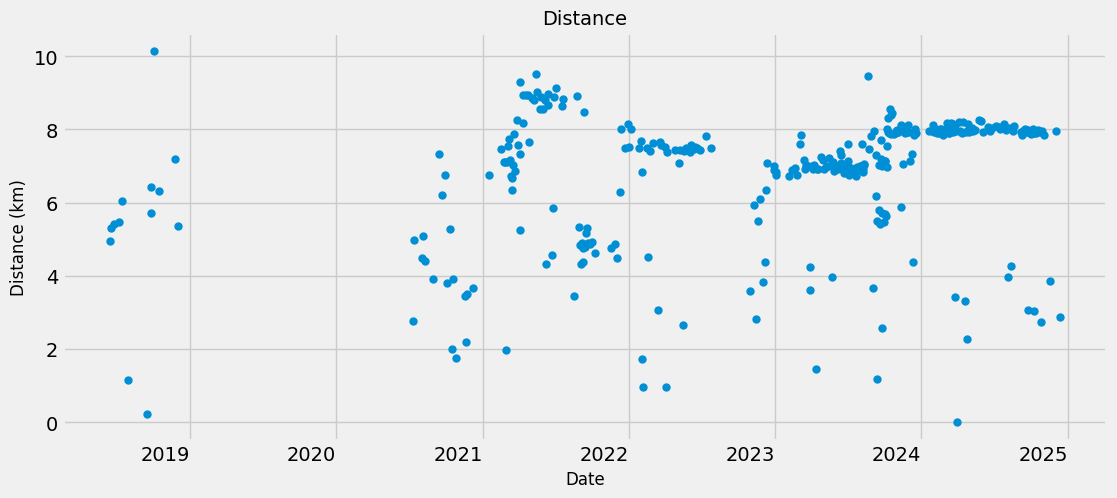

In [371]:
cardio['Distance (km)'].plot(figsize=(12, 6), style='o', markersize=5)
plt.ylabel('Distance (km)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=0)
plt.title('Distance', fontsize=14)
plt.show()

- There was a huge gap between late 2019 and late 2020 (in part due to the pandemic lockdowns). And when I started, I started slow. 
- The distances were usually tied to set routes that I would take depending on where I lived (in Singapore) and what was a scenic walk aroudn that area. 
- For most of 2021 I was living in one place and I must have tried a few different routes then. You can see a big jump in distance when I found a long route that was scenic (around the Singapore River along the Waterfront/Promenade area).
- In late 2021 I moved to another apartment and stuck to a steady route of just under 8 km until August 2022.
- And then there was a gap again when I moved to Bremen in Germany and I only picked back up towards October after settling in.  
- For the whole of 2023 I stuck to one standard route of around 7 km near my apartment, along the edge of Burger Park, the big park in the centre of Bremen.
- Around late July in 2023 I moved to another apartment and I found another route, which was slightly longer at 8 km, again along a nice scenic area next to the Weser river in Bremen.
- The scattered points of smaller distances in between the "steady" phases (early 2022 and 2023, 2024) might have been instances of the RunKeeper app not syncing properly, not detecting start and/or stops due to lack of wifi/4G data or just me stopping early due to getting tired or injured.

In [372]:
cardio.columns

Index(['Activity Id', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Calories Burned', 'Climb (m)'],
      dtype='object')

Duration might be highly correlated with distance because I generally follow the same pace - walking for around 2 minutes followed by jogging/sprinting for 1 minute or so, on average.
The variable is in hours:minutes:seconds format, and some entries were under 1 hour, so it needs to be converted into seconds for analysis.

In [373]:
def duration_to_seconds(duration):
    parts = list(map(int, duration.split(':')))
    if len(parts) == 2:   # for when it's under an hour
        minutes, seconds = parts
        return minutes * 60 + seconds
    elif len(parts) == 3:  #for when it's an hour or more
        hours, minutes, seconds = parts
        return hours * 3600 + minutes * 60 + seconds
    

cardio['Duration (seconds)'] = cardio['Duration'].apply(duration_to_seconds)

In [374]:
# function to show the y-axis ticks in HH:MM:SS format
def seconds_to_hms(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    return f'{int(hours):01}:{int(minutes):02}:{int(seconds):02}'

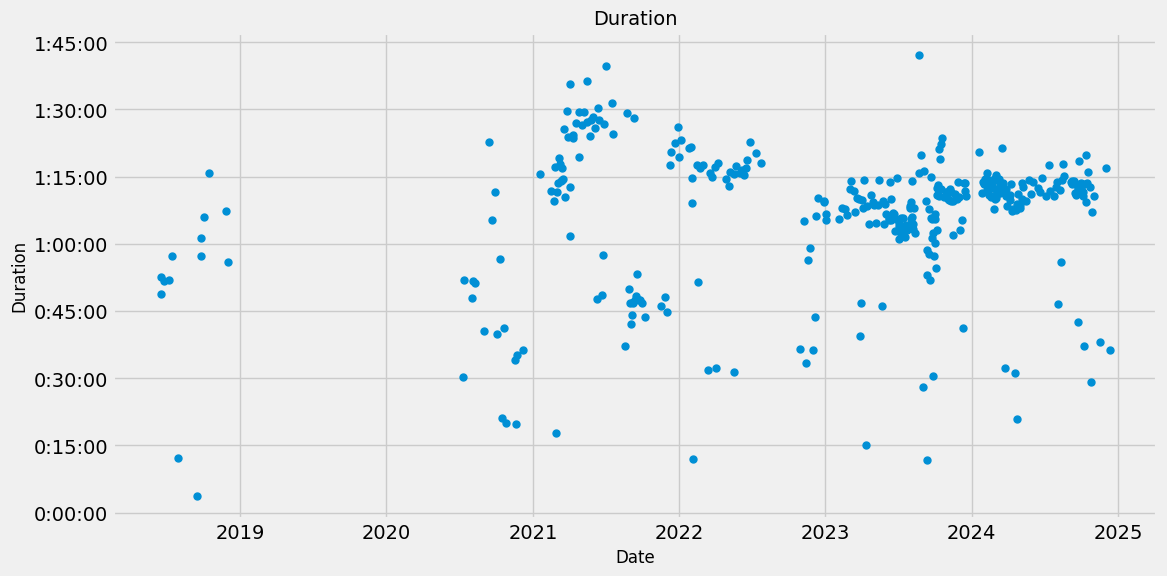

In [375]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cardio.index, cardio['Duration (seconds)'], 'o', markersize=5)
ax.set_ylabel('Duration', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Duration', fontsize=14)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: seconds_to_hms(x)))
ax.yaxis.set_major_locator(MultipleLocator(900))  
plt.xticks(rotation=0)
plt.show()

As expected, duration and distance are highly correlated. The longer the distance, the longer the duration. Some variations could be because of incorrect syncing of the RunKeeper app and other issues.

Average pace and speed should generally be consistent, give or take variations due to the app measurement. The values for Average pace need to be converted from minutes:seconds to seconds though.

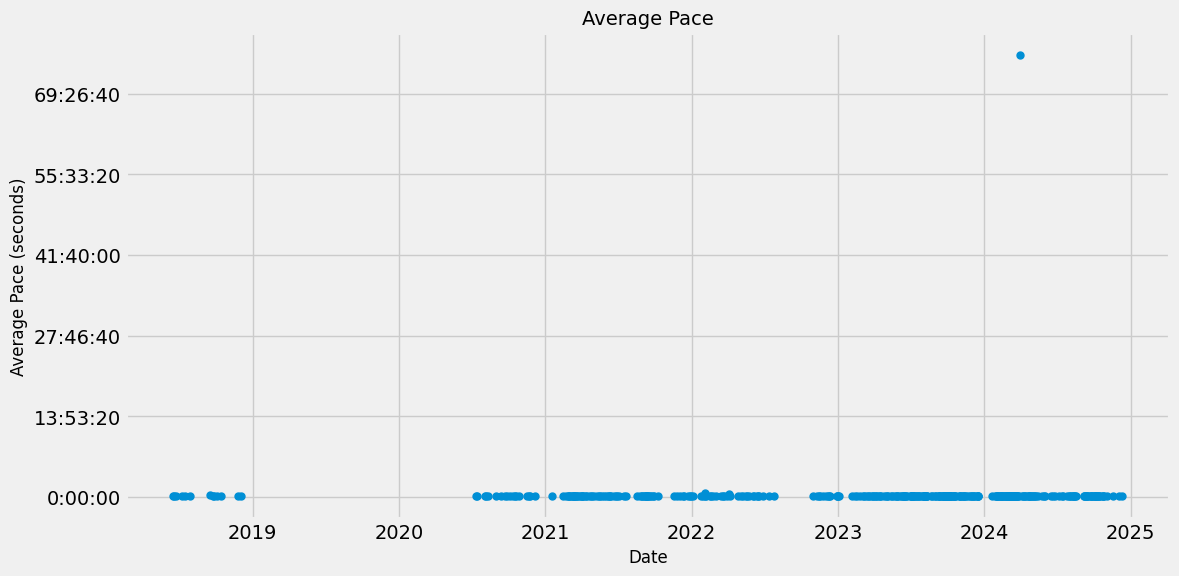

In [376]:
def pace_to_seconds(pace):
    minutes, seconds = map(int, pace.split(':'))
    return minutes * 60 + seconds

cardio['Average Pace (seconds)'] = cardio['Average Pace'].apply(pace_to_seconds)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cardio.index, cardio['Average Pace (seconds)'], 'o', markersize=5)
ax.set_title('Average Pace', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Pace (seconds)', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: seconds_to_hms(x)))
#ax.yaxis.set_major_locator(MultipleLocator(900))  # 900 seconds = 15 minutes
plt.xticks(rotation=0)
plt.show()

Looks like there is an outlier. No way am I so slow that my average pace I take over an hour for a kilometer! This must have been me accidentally turning the RunKeeper activitiy on or forgetting to stop the timer. I will remove this outlier.

In [377]:
cardio.sort_values(by='Average Pace (seconds)', ascending=False).head()

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds)
Date,,,,,,,,,
2024-03-29 17:43:04,6f5cd4d6-bf52-4f98-a662-baefba0c1aea,0.01,1:08:31,4568:53,0.01,107.0,0,4111,274133
2022-02-02 09:57:39,e5731e87-8cc5-48a6-93ba-1b3f56e98b0c,1.73,1:14:40,43:09,1.39,213.0,20,4480,2589
2022-04-02 22:07:47,7e2669b9-5496-4219-a7fc-edcc24fa36d3,0.98,32:18,32:50,1.83,129.0,0,1938,1970
2018-09-16 21:35:08,8c235ff6-0663-496f-9fcf-dc81113263a4,0.22,3:37,16:50,3.56,18.0,4,217,1010
2024-09-23 18:45:14,1b1b9d0d-5385-4724-b42d-e972e7ac484f,3.08,42:38,13:52,4.33,221.0,20,2558,832


Seems like the top 3 are outliers . Even 32:50 is too slow for me. 

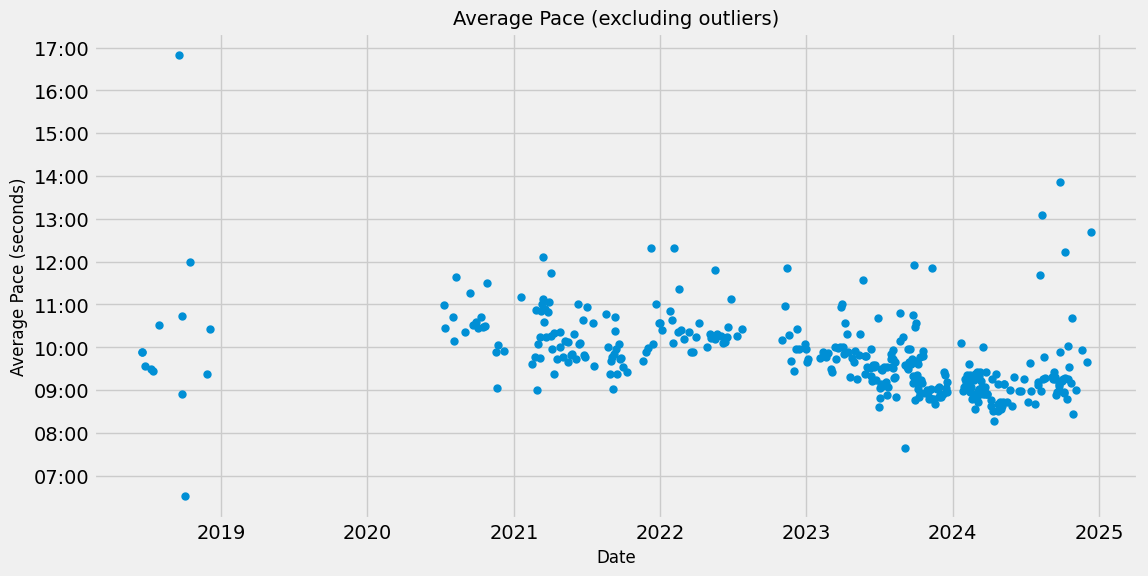

In [378]:
exclude_avg_pace = ['6f5cd4d6-bf52-4f98-a662-baefba0c1aea','e5731e87-8cc5-48a6-93ba-1b3f56e98b0c','7e2669b9-5496-4219-a7fc-edcc24fa36d3']
filtered_cardio_avg_pace = cardio[~cardio['Activity Id'].isin(exclude_avg_pace)]


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(filtered_cardio_avg_pace.index, filtered_cardio_avg_pace['Average Pace (seconds)'], 'o', markersize=5)
ax.set_title('Average Pace (excluding outliers)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Pace (seconds)', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int((x % 3600) // 60):02}:{int(x % 60):02}'))
ax.yaxis.set_major_locator(MultipleLocator(60)) 
plt.show()


That's more like it. I usually average around 9 to 10 minutes per km (including walks + sprints).

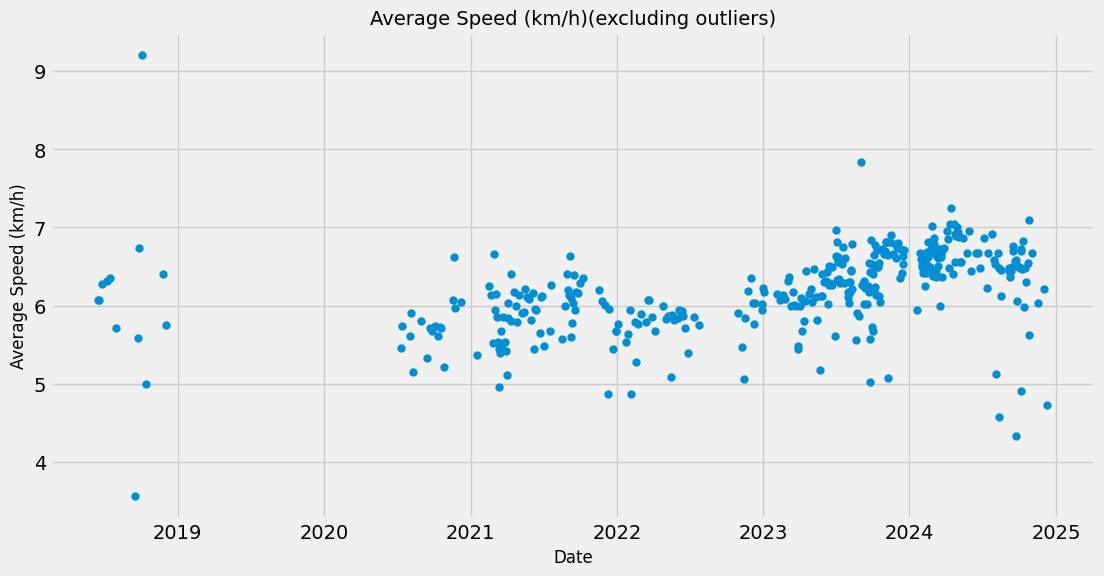

In [379]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(filtered_cardio_avg_pace.index, filtered_cardio_avg_pace['Average Speed (km/h)'], 'o', markersize=5)
ax.set_title('Average Speed (km/h)(excluding outliers)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Speed (km/h)', fontsize=12)
plt.show()

Average speed almost mirrors the pace, as expected.

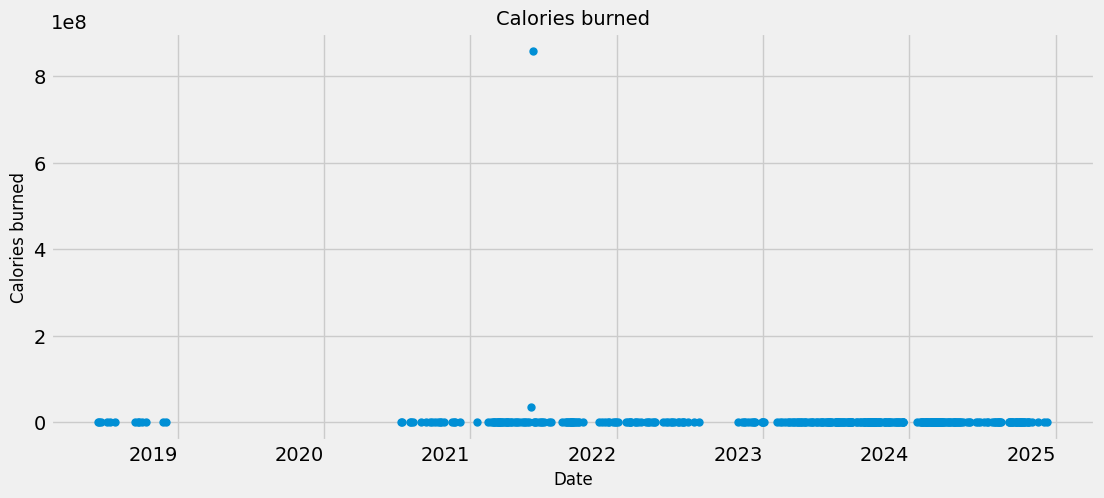

In [380]:
cardio['Calories Burned'].plot(figsize=(12, 6), style='o',  markersize=5)
plt.ylabel('Calories burned', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=0)
plt.title('Calories burned', fontsize=14)
plt.show()

Calories burned also seems to have outliers. No way am I burning calories to the order of 8!

In [381]:
cardio.sort_values(by='Calories Burned', ascending=False).head()

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds)
Date,,,,,,,,,
2021-06-04 23:48:10,0a4cc07b-d889-4b30-82b8-99b1c19cac7f,8.81,1:25:47,9:44,6.16,857607276.0,231,5147,584
2021-05-31 22:05:01,40befe8e-a1f1-42ae-aa44-5ca3384b31b3,8.55,1:28:13,10:19,5.82,34130321.0,200,5293,619
2021-04-03 22:24:25,1c420a15-6f4f-4b7c-b1fb-fcf86b7b6bed,9.31,1:35:36,10:16,5.84,801.0,227,5736,616
2021-06-11 22:35:30,d89f68f6-607e-42cf-87a2-c3c5eaf50792,8.98,1:30:22,10:04,5.96,788.0,223,5422,604
2021-07-02 23:20:58,54e7f49a-4e7a-4bc8-bb77-af621bc1f5a3,9.13,1:39:49,10:56,5.49,779.0,220,5989,656


This is strange. The duration, pace and distances of the outliers seem normla but calories burned is way off. This has to be an error with the app features. I will remove these outliers.

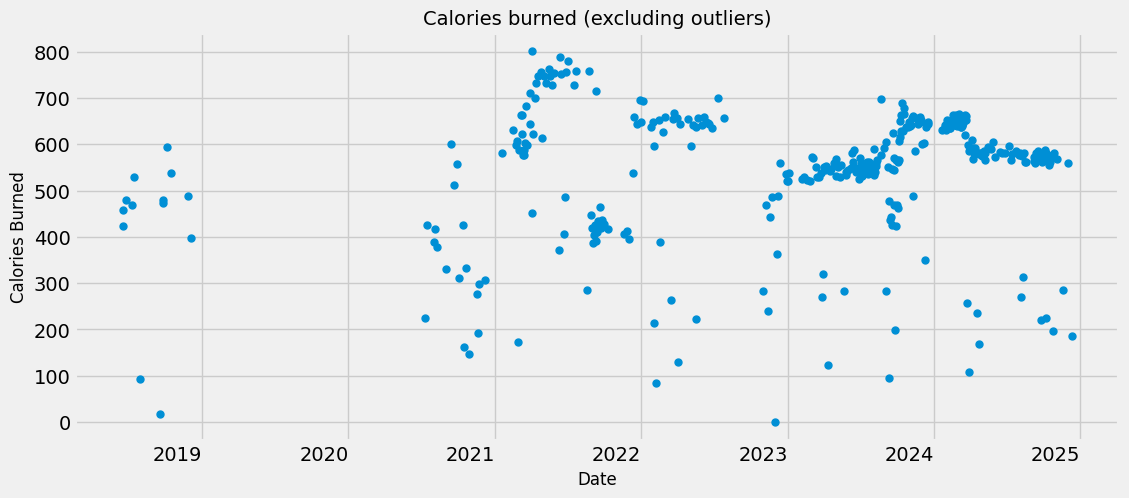

In [382]:
# Define the activity ids to exclude
exclude_calories = ['0a4cc07b-d889-4b30-82b8-99b1c19cac7f', '40befe8e-a1f1-42ae-aa44-5ca3384b31b3']

# Filter the dataframe to exclude the specified activity ids
filtered_cardio = cardio[~cardio['Activity Id'].isin(exclude_calories)]

filtered_cardio['Calories Burned'].plot(figsize=(12, 6), style='o',  markersize=5)
plt.ylabel('Calories Burned', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=0)
plt.title('Calories burned (excluding outliers)', fontsize=14)
plt.show()

That makes sense. Fairly simple correlation between distance run and calories burned. The app does not track calories through heart rate or other biometric data, so it's a rough estimate based on distance and pace. So this makes sense.

Interestingly, I see a slight jump in calories burned in late 2023 and early 2024, despite the Distance and Duration being approximately the same in this period. This dropped back down around mid 2024 to a normal level. I can only guess that this was due to a slight increase in speed (which can also be seen in the slight drop in the Average Pace graph and increase in the Average Speed graph), as I remember exerting myself a little more during that period, with faster sprints.

This is good insight - helps me try and push myself a little more, knowing I can do it since I know I have done it before. 

Not sure what I can glean from change in the climb over time. I have usually taken flat routes (with some stairs, overhead bridges across roads etc. sometimes) don't think I have changed my routes much. I will look at the data to see if there is any pattern.

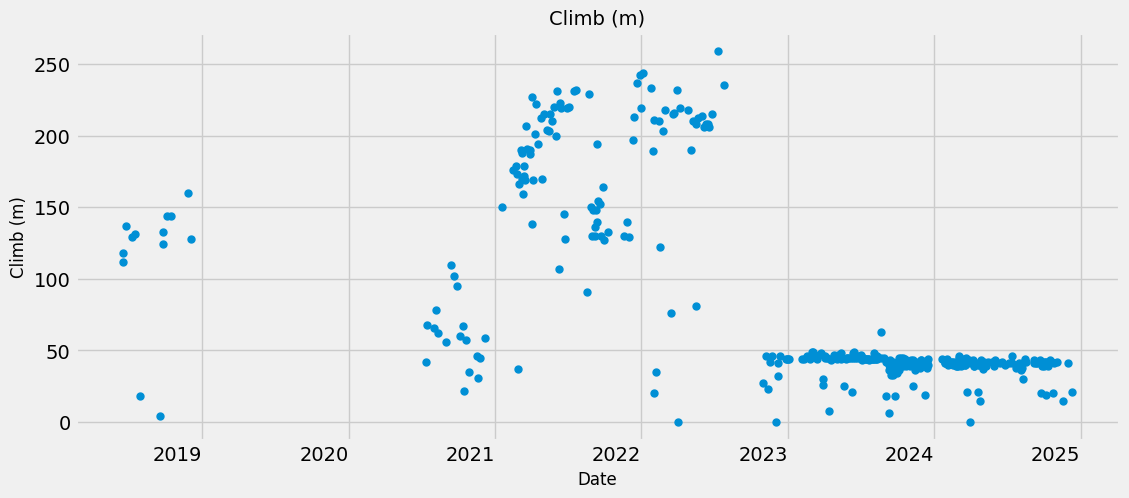

In [383]:
cardio['Climb (m)'].plot(figsize=(12, 6), style='o', markersize=5)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Climb (m)', fontsize=12)
plt.xticks(rotation=0)
plt.title('Climb (m)', fontsize=14)
plt.show()


Hmmm, this is interesting. The routes after I moved to Bremen have been flat. The routes in Singapore (pre-2022 August) have had some climb. I realise that there were no stairs or overhead bridges that I traversed in Bremen, whereas those were quite common in Singapore.  

Lastly, I was also curious about the times during the day that I start a run. Sometimes this is helpful when I feel lazy close to sunset and think that it is too late, but in reality I may have started a run at that time before.

RunKeeper records the time at which I press the start timer. I remember getting the workouts in Singapore after sunset, sometimes even well into the night, because of the cooler weather. When I moved to Bremen I continued this habit for a while, even during winter when it got really cold. But slowly I started running earlier, before the sunset to catch as much light as I could outside.

In [384]:
cardio.head()

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds)
Date,,,,,,,,,
2024-12-10 18:00:57,c37e7ff3-a8ab-4739-95d5-b0631c47ddd7,2.87,36:22,12:41,4.73,186.0,21,2182,761
2024-12-01 15:23:10,becc4798-4db0-4a19-bf61-c32ebd5650f2,7.97,1:16:59,9:40,6.21,559.0,41,4619,580
2024-11-17 16:04:34,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,3.85,38:12,9:56,6.04,285.0,15,2292,596
2024-11-02 16:15:58,98b4b003-9d1c-4743-bd88-b19766453fdd,7.86,1:10:45,9:00,6.67,568.0,42,4245,540
2024-10-26 17:14:17,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,7.95,1:07:10,8:27,7.10,580.0,41,4030,507


In [385]:
cardio['Time'] = cardio.index.time
cardio['Time_seconds'] = cardio['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
 

In [386]:
cardio.sort_values(by='Time_seconds', ascending=True).head(50)

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds),Time,Time_seconds
Date,,,,,,,,,,,
2022-07-25 02:31:33,540f2b89-9c0d-4ce6-bc3f-2afd0b6e98d3,7.49,1:18:09,10:26,5.75,656.0,235,4689,626,02:31:33,9093
2020-10-16 05:51:40,565816b0-e717-4f59-af56-3acc27b64704,2.01,21:04,10:29,5.73,161.0,22,1264,629,05:51:40,21100
2018-12-03 05:53:31,372fc193-207b-4c19-abb7-a5ca381a063d,5.36,55:55,10:26,5.75,397.0,128,3355,626,05:53:31,21211
2022-02-02 09:57:39,e5731e87-8cc5-48a6-93ba-1b3f56e98b0c,1.73,1:14:40,43:09,1.39,213.0,20,4480,2589,09:57:39,35859
2022-02-05 12:36:10,4cd89420-c5b4-49c2-afc1-64323b73765e,0.97,11:55,12:19,4.87,84.0,35,715,739,12:36:10,45370
2024-12-01 15:23:10,becc4798-4db0-4a19-bf61-c32ebd5650f2,7.97,1:16:59,9:40,6.21,559.0,41,4619,580,15:23:10,55390
2023-12-03 15:33:08,393b02a2-1cab-4110-ad51-c8c851655c92,7.15,1:03:08,8:50,6.80,600.0,41,3788,530,15:33:08,55988
2023-12-17 15:35:21,aec5b33b-318b-44e4-b428-ebf5acae76d9,7.90,1:10:38,8:57,6.71,643.0,44,4238,537,15:35:21,56121
2023-12-16 15:36:51,b970a9c2-5e08-4d80-8f3f-d0efd38ad195,8.02,1:13:41,9:11,6.53,648.0,40,4421,551,15:36:51,56211


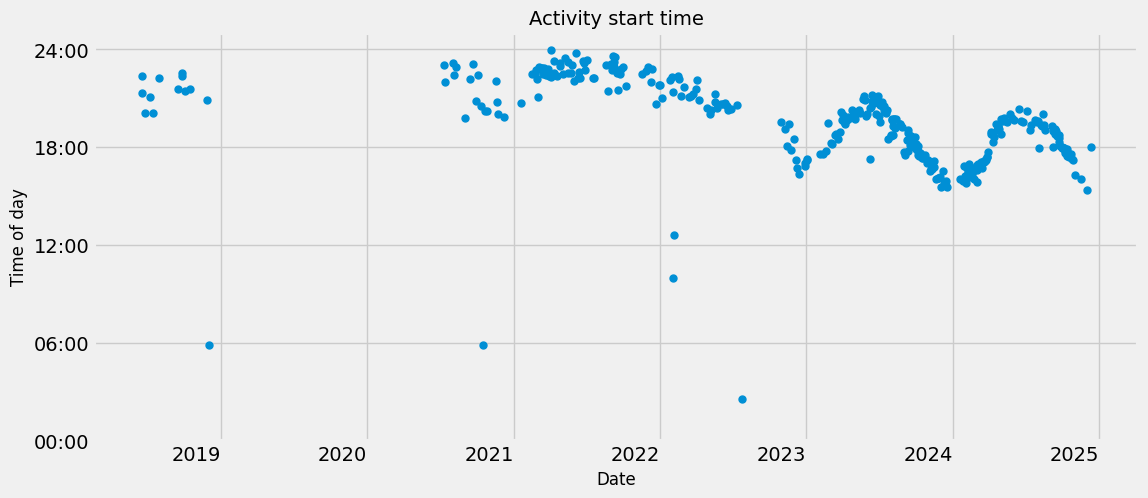

In [387]:
cardio['Time_seconds'].plot(figsize=(12, 6), style='o', markersize=5)
plt.yticks(range(0, 25 * 3600, 6 * 3600), [f"{i:02}:00" for i in range(0, 25, 6)])

plt.xlabel("Date", fontsize=12)
plt.ylabel("Time of day", fontsize=12)
plt.title("Activity start time", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [388]:
for i in range(0, 25, 3):
    print(f"{i:02}:00")

00:00
03:00
06:00
09:00
12:00
15:00
18:00
21:00
24:00


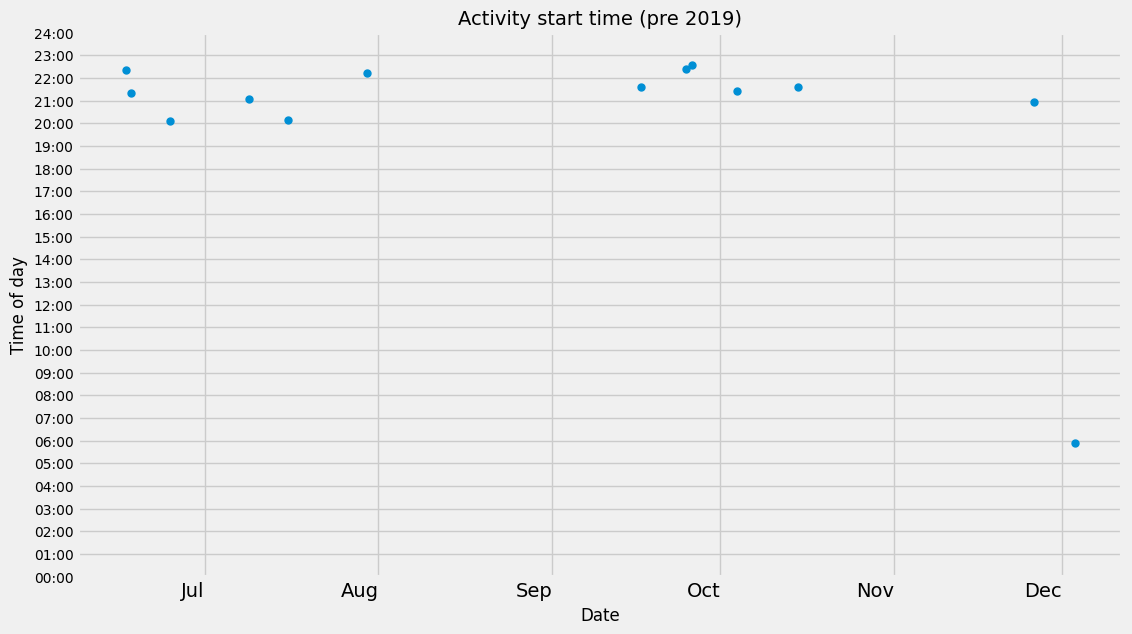

In [389]:
df_pre_2019 = cardio[cardio.index < '2019-01-01']

df_pre_2019['Time_seconds'].plot(figsize=(12, 8), style='o', markersize=5)
plt.yticks(range(0, 25 * 3600, 3600), [f"{i:02}:00" for i in range(0, 25)], fontsize=10)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Time of day", fontsize=12)
plt.title("Activity start time (pre 2019)", fontsize=14)
plt.xticks(rotation=0)
plt.show()

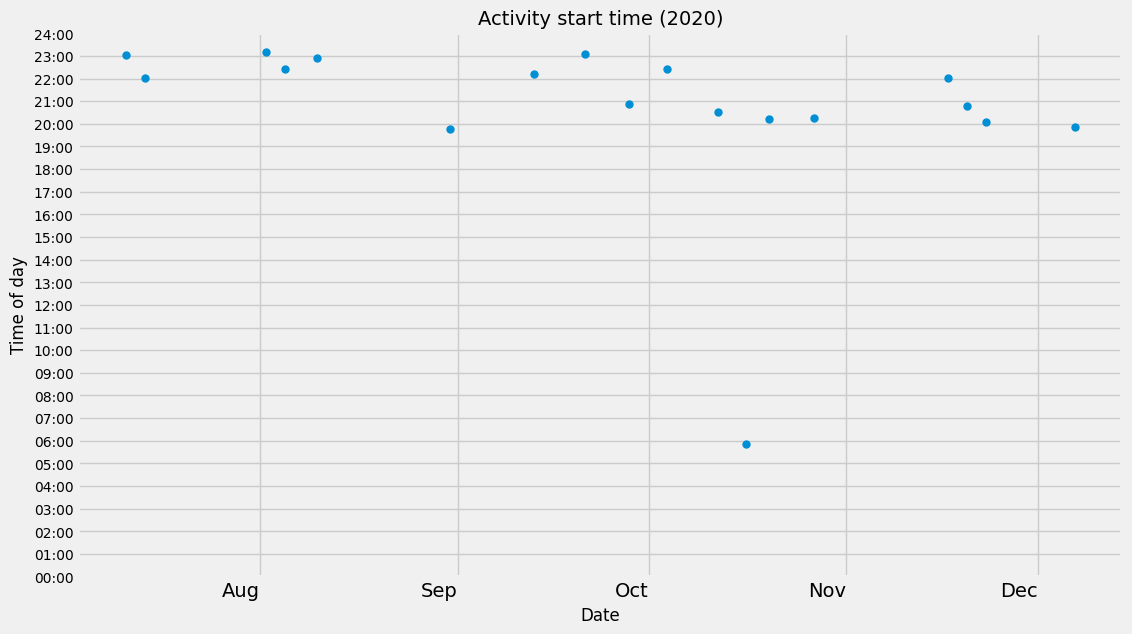

In [390]:
df_2020 = cardio[cardio.index.year == 2020]

df_2020['Time_seconds'].plot(figsize=(12, 8), style='o', markersize=5)
plt.yticks(range(0, 25 * 3600, 3600), [f"{i:02}:00" for i in range(0, 25)], fontsize=10)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Time of day", fontsize=12)
plt.title("Activity start time (2020)", fontsize=14)
plt.xticks(rotation=0)
plt.show()

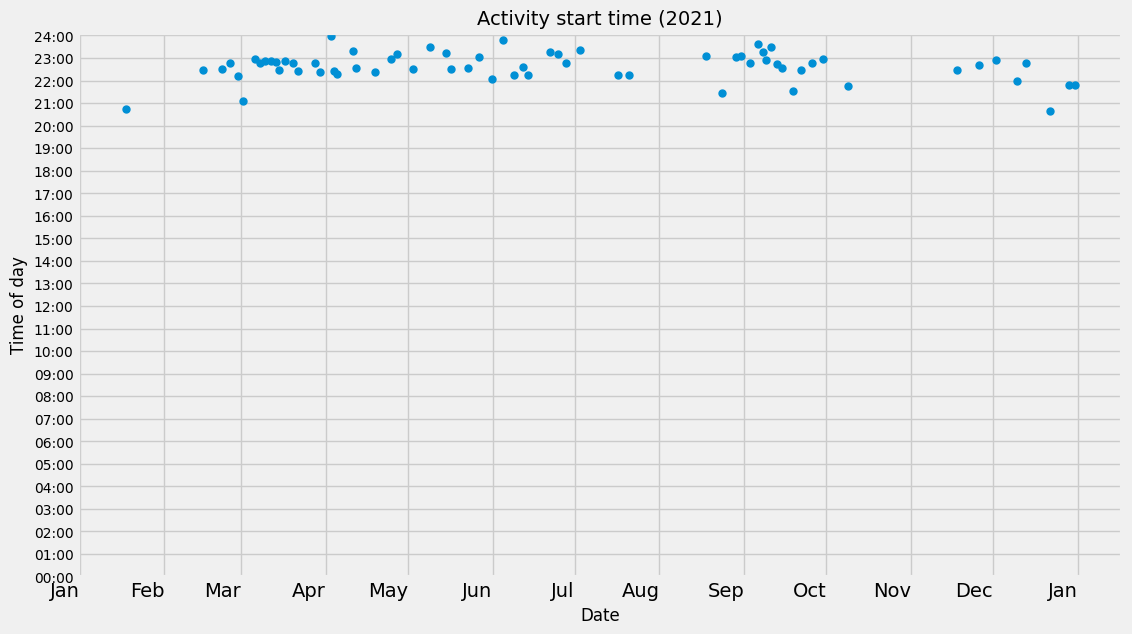

In [391]:
df_2021 = cardio[cardio.index.year == 2021]

df_2021['Time_seconds'].plot(figsize=(12,8), style='o', markersize=5)
plt.yticks(range(0, 25 * 3600, 3600), [f"{i:02}:00" for i in range(0, 25)], fontsize=10)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Time of day", fontsize=12)
plt.title("Activity start time (2021)", fontsize=14)
plt.xticks(rotation=0)
plt.show()

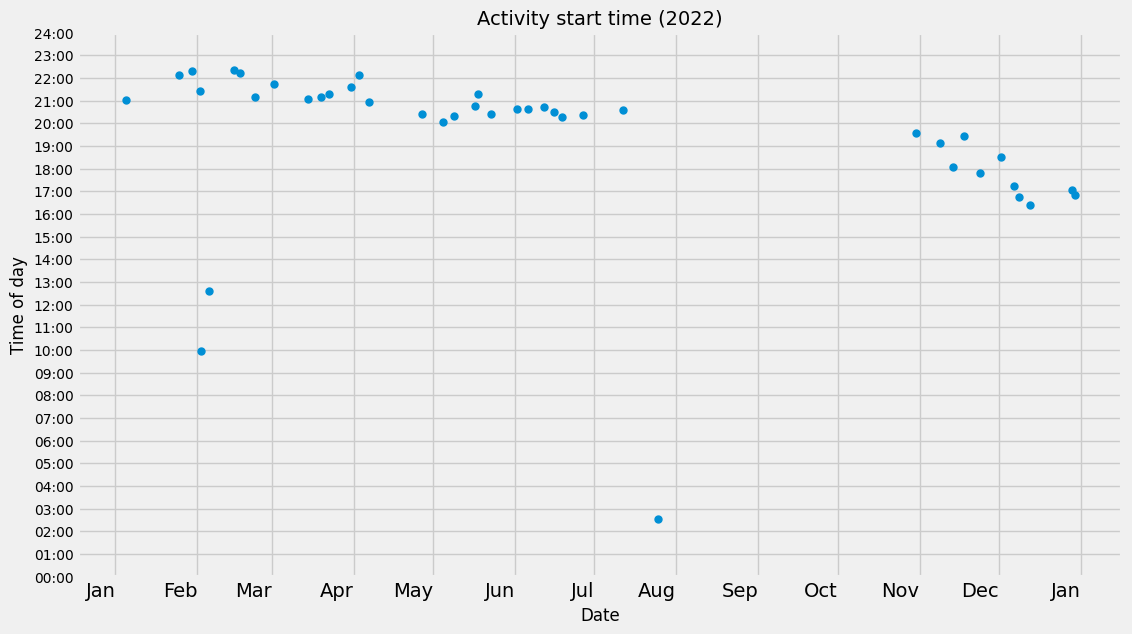

In [392]:
df_2022 = cardio[cardio.index.year == 2022]

df_2022['Time_seconds'].plot(figsize=(12, 8), style='o', markersize=5)
plt.yticks(range(0, 25 * 3600, 3600), [f"{i:02}:00" for i in range(0, 25)], fontsize=10)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Time of day", fontsize=12)
plt.title("Activity start time (2022)", fontsize=14)
plt.xticks(rotation=0)
plt.show()

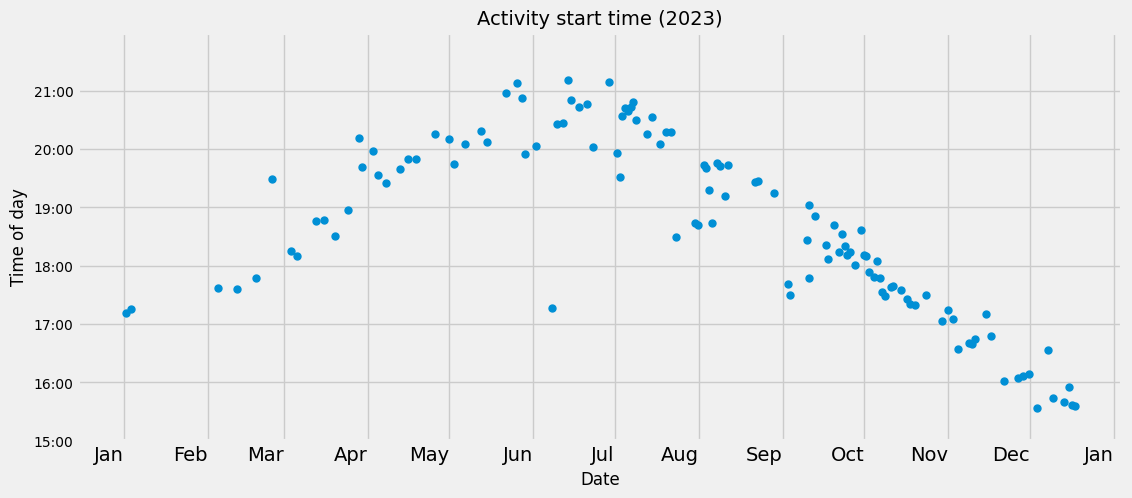

In [393]:
df_2023 = cardio[cardio.index.year == 2023]

df_2023['Time_seconds'].plot(figsize=(12, 6), style='o', markersize=5)
plt.yticks(range(15 * 3600, 22 * 3600, 3600), [f"{i:02}:00" for i in range(15, 22)], fontsize=10)
plt.gca().set_ylim(15 * 3600, 22 * 3600)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Time of day", fontsize=12)
plt.title("Activity start time (2023)", fontsize=14)
plt.xticks(rotation=0)
plt.show()

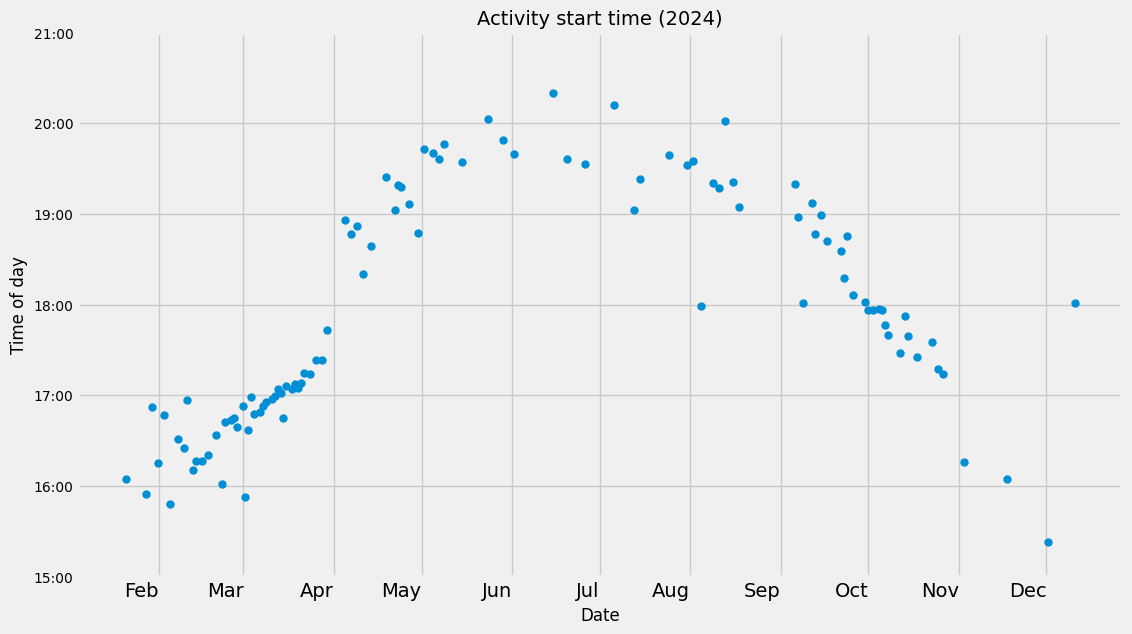

In [394]:
df_2024 = cardio[cardio.index.year == 2024]

df_2024['Time_seconds'].plot(figsize=(12, 8), style='o', markersize=5)
plt.yticks(range(15 * 3600, 22 * 3600, 3600), [f"{i:02}:00" for i in range(15, 22)], fontsize=10)
plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Time of day", fontsize=12)
plt.title("Activity start time (2024)", fontsize=14)
plt.xticks(rotation=0)
plt.show()

As expected, the workouts were usually in the evening before late 2022, after it got dark. Some were even well into the night, close to 10 pm. Looking back at it now, I can't believe I was out that late! 

But after moving to Bremen, I started running earlier, before the sunset, to catch as much light as I could outside. This also meant that I would change my start time to match the changing sunset times throughout the seasons in the year, usually around 1 hour or so before the sunset. This can be seen in the wave like pattern in the graph post 2023.

Just to visualise this, I also wanted to overlay this graph with the sunset times - in Singapore for pre-2022 August and in Bremen for post-2022 August.
Getting the sunset times was not as easy as I thought. After some research, I found a Python package called pvlib which can retrieve the sunset times from the past for specific latitude and longitude coordinates.

In [395]:
import pvlib


In [396]:
cardio.sort_index()

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds),Time,Time_seconds
Date,,,,,,,,,,,
2018-06-16 22:21:37,9116da41-8f3f-4d43-be98-543467311f65,4.95,48:54,9:53,6.07,423.0,112,2934,593,22:21:37,80497
2018-06-17 21:20:03,05a6e5ef-41f4-44ba-bc5d-575c7306e614,5.32,52:31,9:53,6.07,457.0,118,3151,593,21:20:03,76803
2018-06-24 20:06:31,cc2878b6-ed07-4e4b-9632-98041ce7ea40,5.41,51:43,9:34,6.28,479.0,137,3103,574,20:06:31,72391
2018-07-08 21:05:30,076e4651-a03e-4daf-ab56-a31c90eb2db5,5.48,52:03,9:30,6.32,469.0,129,3123,570,21:05:30,75930
2018-07-15 20:07:34,4b32b5a8-51c1-42e1-8a48-d6c4dd823d32,6.06,57:12,9:27,6.35,529.0,131,3432,567,20:07:34,72454
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26 17:14:17,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,7.95,1:07:10,8:27,7.10,580.0,41,4030,507,17:14:17,62057
2024-11-02 16:15:58,98b4b003-9d1c-4743-bd88-b19766453fdd,7.86,1:10:45,9:00,6.67,568.0,42,4245,540,16:15:58,58558
2024-11-17 16:04:34,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,3.85,38:12,9:56,6.04,285.0,15,2292,596,16:04:34,57874


In [397]:
sg_lat =  1.35
sg_long = 103.82
sg_timezone = "Singapore"
sg_dates = pd.date_range(start="2018-06-01 ", end="2022-08-01", freq="D", tz=sg_timezone)
sg = pvlib.location.Location(sg_lat, sg_long, tz=sg_timezone)
sg_sun_times = sg.get_sun_rise_set_transit(sg_dates)
sg_sun_times.head()

,sunrise,sunset,transit
2018-06-01 00:00:00+08:00,2018-06-01 06:56:26.486822+08:00,2018-06-01 19:08:33.853233+08:00,2018-06-01 13:02:29.876738+08:00
2018-06-02 00:00:00+08:00,2018-06-02 06:56:34.530514+08:00,2018-06-02 19:08:44.259273+08:00,2018-06-02 13:02:39.114610+08:00
2018-06-03 00:00:00+08:00,2018-06-03 06:56:43.019239+08:00,2018-06-03 19:08:55.003683+08:00,2018-06-03 13:02:48.744420+08:00
2018-06-04 00:00:00+08:00,2018-06-04 06:56:51.939140+08:00,2018-06-04 19:09:06.070556+08:00,2018-06-04 13:02:58.751276+08:00
2018-06-05 00:00:00+08:00,2018-06-05 06:57:01.275444+08:00,2018-06-05 19:09:17.443172+08:00,2018-06-05 13:03:09.119426+08:00


In [398]:
sg_sun_times['sunset'][:3].dt.time

2018-06-01 00:00:00+08:00    19:08:33.853233
2018-06-02 00:00:00+08:00    19:08:44.259273
2018-06-03 00:00:00+08:00    19:08:55.003683
Freq: D, Name: sunset, dtype: object

In [399]:
sg_sunset_df = pd.DataFrame({
    "Date": sg_sun_times['sunset'].dt.date,
    "Sunset_Time": sg_sun_times['sunset'].dt.time
})

sg_sunset_df.head()

,Date,Sunset_Time
2018-06-01 00:00:00+08:00,2018-06-01,19:08:33.853233
2018-06-02 00:00:00+08:00,2018-06-02,19:08:44.259273
2018-06-03 00:00:00+08:00,2018-06-03,19:08:55.003683
2018-06-04 00:00:00+08:00,2018-06-04,19:09:06.070556
2018-06-05 00:00:00+08:00,2018-06-05,19:09:17.443172


In [400]:
sg_sunset_df.head()

,Date,Sunset_Time
2018-06-01 00:00:00+08:00,2018-06-01,19:08:33.853233
2018-06-02 00:00:00+08:00,2018-06-02,19:08:44.259273
2018-06-03 00:00:00+08:00,2018-06-03,19:08:55.003683
2018-06-04 00:00:00+08:00,2018-06-04,19:09:06.070556
2018-06-05 00:00:00+08:00,2018-06-05,19:09:17.443172


In [401]:
sg_sunset_df['Sunset_Time_Seconds'] = sg_sunset_df['Sunset_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
sg_sunset_df.head()


,Date,Sunset_Time,Sunset_Time_Seconds
2018-06-01 00:00:00+08:00,2018-06-01,19:08:33.853233,68913
2018-06-02 00:00:00+08:00,2018-06-02,19:08:44.259273,68924
2018-06-03 00:00:00+08:00,2018-06-03,19:08:55.003683,68935
2018-06-04 00:00:00+08:00,2018-06-04,19:09:06.070556,68946
2018-06-05 00:00:00+08:00,2018-06-05,19:09:17.443172,68957


In [402]:
sg_sunset_df.set_index('Date', inplace=True)
cardio['Date'] = cardio.index.date  # Extract the date component from the index of df2
cardio.set_index('Date', inplace=True)
sg_merged_df = cardio.merge(sg_sunset_df, left_index=True, right_index=True, suffixes=('_activity', '_sunset'))
sg_merged_df


,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds),Time,Time_seconds,Sunset_Time,Sunset_Time_Seconds
Date,,,,,,,,,,,,,
2018-06-16,9116da41-8f3f-4d43-be98-543467311f65,4.95,48:54,9:53,6.07,423.0,112,2934,593,22:21:37,80497,19:11:36.772738,69096
2018-06-17,05a6e5ef-41f4-44ba-bc5d-575c7306e614,5.32,52:31,9:53,6.07,457.0,118,3151,593,21:20:03,76803,19:11:50.075458,69110
2018-06-24,cc2878b6-ed07-4e4b-9632-98041ce7ea40,5.41,51:43,9:34,6.28,479.0,137,3103,574,20:06:31,72391,19:13:21.389824,69201
2018-07-08,076e4651-a03e-4daf-ab56-a31c90eb2db5,5.48,52:03,9:30,6.32,469.0,129,3123,570,21:05:30,75930,19:15:52.062192,69352
2018-07-15,4b32b5a8-51c1-42e1-8a48-d6c4dd823d32,6.06,57:12,9:27,6.35,529.0,131,3432,567,20:07:34,72454,19:16:38.710916,69398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-15,12982597-4186-466a-ad27-f1772bef1a56,7.51,1:16:51,10:14,5.87,646.0,208,4611,614,20:30:34,73834,19:11:25.932054,69085
2022-06-18,92829804-89f8-4d63-bea0-2509b7d96536,7.50,1:18:43,10:29,5.72,644.0,206,4723,629,20:16:09,72969,19:12:05.348246,69125
2022-06-26,0df3e890-1c2b-4962-ba18-c91ffc8cd8fc,7.43,1:22:38,11:07,5.39,634.0,215,4958,667,20:21:09,73269,19:13:48.581558,69228


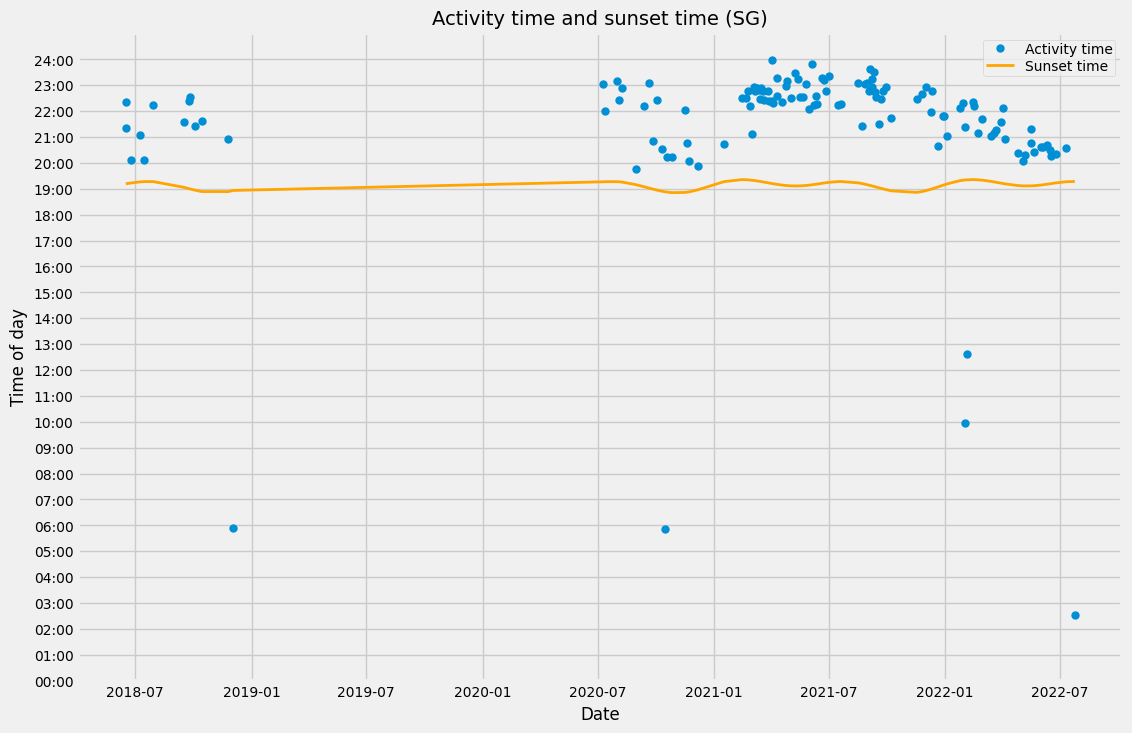

In [413]:
sg_merged_df['Time_seconds'].plot(figsize=(12, 8), style='o', markersize=5, label='Activity time')
#plt.plot(sg_merged_df.index, sg_merged_df['Time_Seconds'], label='Activity Time')
plt.plot(sg_merged_df.index, sg_merged_df['Sunset_Time_Seconds'], label='Sunset time', color='orange',linewidth=2.0)
plt.yticks(range(0, 25 * 3600, 3600), [f"{i:02}:00" for i in range(0, 25)], fontsize=10)
plt.xlabel("Date", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Time of day', fontsize=12)
plt.title('Activity time and sunset time (SG)', fontsize=14)
plt.legend(loc='upper right', fontsize= 10, borderpad = 0.2, labelspacing = 0.2)
plt.grid(True)
plt.show()

In [404]:
br_lat =  53.07
br_long = 8.80
br_timezone = "Europe/Berlin"
br_dates = pd.date_range(start="2022-08-01", end="2024-12-31", freq="D", tz=br_timezone)
br = pvlib.location.Location(br_lat, br_long, tz=br_timezone)
br_sun_times = br.get_sun_rise_set_transit(br_dates)
br_sun_times.head()

,sunrise,sunset,transit
2022-08-01 00:00:00+02:00,2022-08-01 05:41:35.558738+02:00,2022-08-01 21:19:39.836660+02:00,2022-08-01 13:31:10.632855+02:00
2022-08-02 00:00:00+02:00,2022-08-02 05:43:13.015341+02:00,2022-08-02 21:17:53.709204+02:00,2022-08-02 13:31:06.580326+02:00
2022-08-03 00:00:00+02:00,2022-08-03 05:44:51.080798+02:00,2022-08-03 21:16:05.770019+02:00,2022-08-03 13:31:01.904766+02:00
2022-08-04 00:00:00+02:00,2022-08-04 05:46:29.701224+02:00,2022-08-04 21:14:16.071044+02:00,2022-08-04 13:30:56.605776+02:00
2022-08-05 00:00:00+02:00,2022-08-05 05:48:08.825412+02:00,2022-08-05 21:12:24.664540+02:00,2022-08-05 13:30:50.684502+02:00


In [405]:
br_sunset_df = pd.DataFrame({
    "Date": br_sun_times['sunset'].dt.date,
    "Sunset_Time": br_sun_times['sunset'].dt.time
})

In [406]:
br_sunset_df['Sunset_Time_Seconds'] = br_sunset_df['Sunset_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
br_sunset_df.head()


,Date,Sunset_Time,Sunset_Time_Seconds
2022-08-01 00:00:00+02:00,2022-08-01,21:19:39.836660,76779
2022-08-02 00:00:00+02:00,2022-08-02,21:17:53.709204,76673
2022-08-03 00:00:00+02:00,2022-08-03,21:16:05.770019,76565
2022-08-04 00:00:00+02:00,2022-08-04,21:14:16.071044,76456
2022-08-05 00:00:00+02:00,2022-08-05,21:12:24.664540,76344


In [407]:
br_sunset_df.set_index('Date', inplace=True)


In [408]:
br_merged_df = cardio.merge(br_sunset_df, left_index=True, right_index=True, suffixes=('_activity', '_sunset'))
br_merged_df 

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds),Time,Time_seconds,Sunset_Time,Sunset_Time_Seconds
Date,,,,,,,,,,,,,
2022-10-30,d684fcb0-624c-44e9-8d30-9d441cf94bf4,3.59,36:26,10:10,5.91,284.0,27,2186,610,19:34:07,70447,16:57:55.728474,61075
2022-11-08,8929a957-820c-4b96-8d35-dfe74d660add,5.93,1:05:02,10:58,5.47,468.0,46,3902,658,19:07:44,68864,16:41:16.766693,60076
2022-11-13,9a53b64d-60a2-4c2e-8477-8c76ed9fd2bf,2.82,33:26,11:51,5.06,240.0,23,2006,711,18:03:53,65033,16:33:07.064666,59587
2022-11-17,9836578e-9c0c-41e9-8c0b-d74d3224ff9a,5.49,56:24,10:17,5.84,442.0,42,3384,617,19:27:21,70041,16:27:15.168402,59235
2022-11-23,6b2bbf11-a18a-42b1-8462-3d5fd0277ba6,6.10,59:05,9:41,6.19,487.0,46,3545,581,17:48:56,64136,16:19:43.087414,58783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,7.95,1:07:10,8:27,7.10,580.0,41,4030,507,17:14:17,62057,18:04:55.209944,65095
2024-11-02,98b4b003-9d1c-4743-bd88-b19766453fdd,7.86,1:10:45,9:00,6.67,568.0,42,4245,540,16:15:58,58558,16:51:08.655170,60668
2024-11-17,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,3.85,38:12,9:56,6.04,285.0,15,2292,596,16:04:34,57874,16:26:32.305094,59192


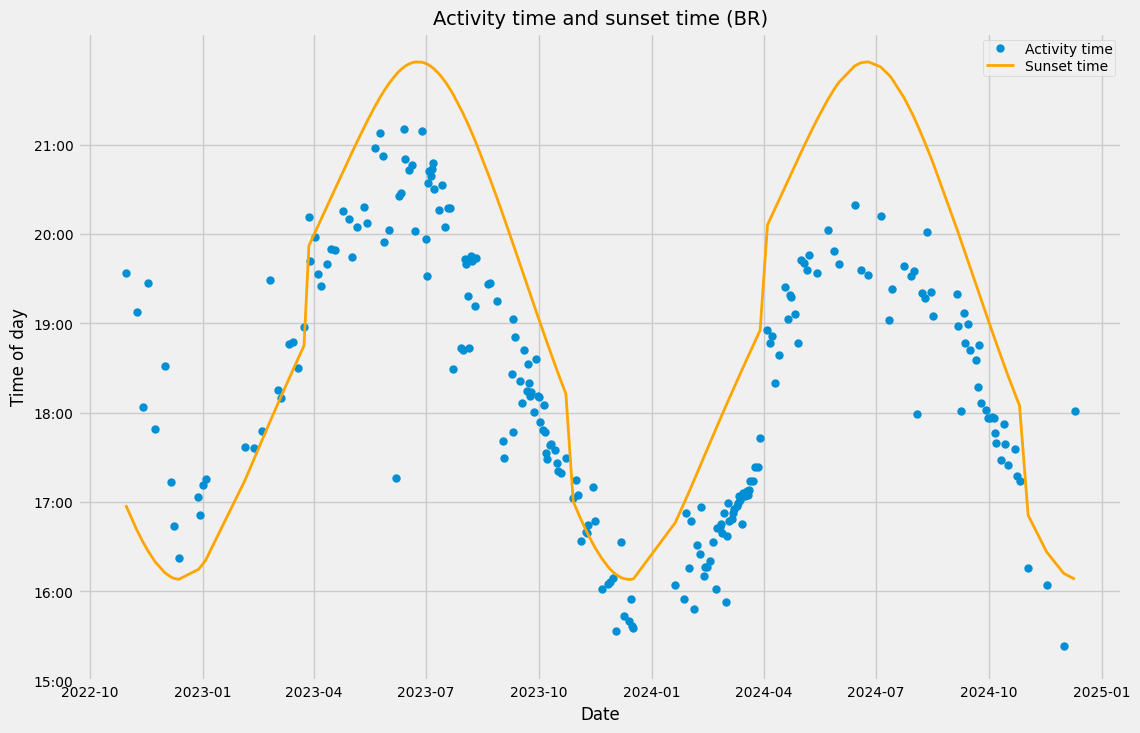

In [414]:
br_merged_df['Time_seconds'].plot(figsize=(12, 8), style='o', markersize=5, label='Activity time')
plt.plot(br_merged_df.index, br_merged_df['Sunset_Time_Seconds'], label='Sunset time', color='orange',linewidth=2.0)
plt.yticks(range(15 * 3600, 22 * 3600, 3600), [f"{i:02}:00" for i in range(15, 22)], fontsize=10)
plt.xlabel("Date", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel('Time of day', fontsize=12)
plt.title('Activity time and sunset time (BR)', fontsize=14)
plt.legend(loc='upper right', fontsize= 10, borderpad = 0.2, labelspacing = 0.2)
plt.grid(True)
plt.show()

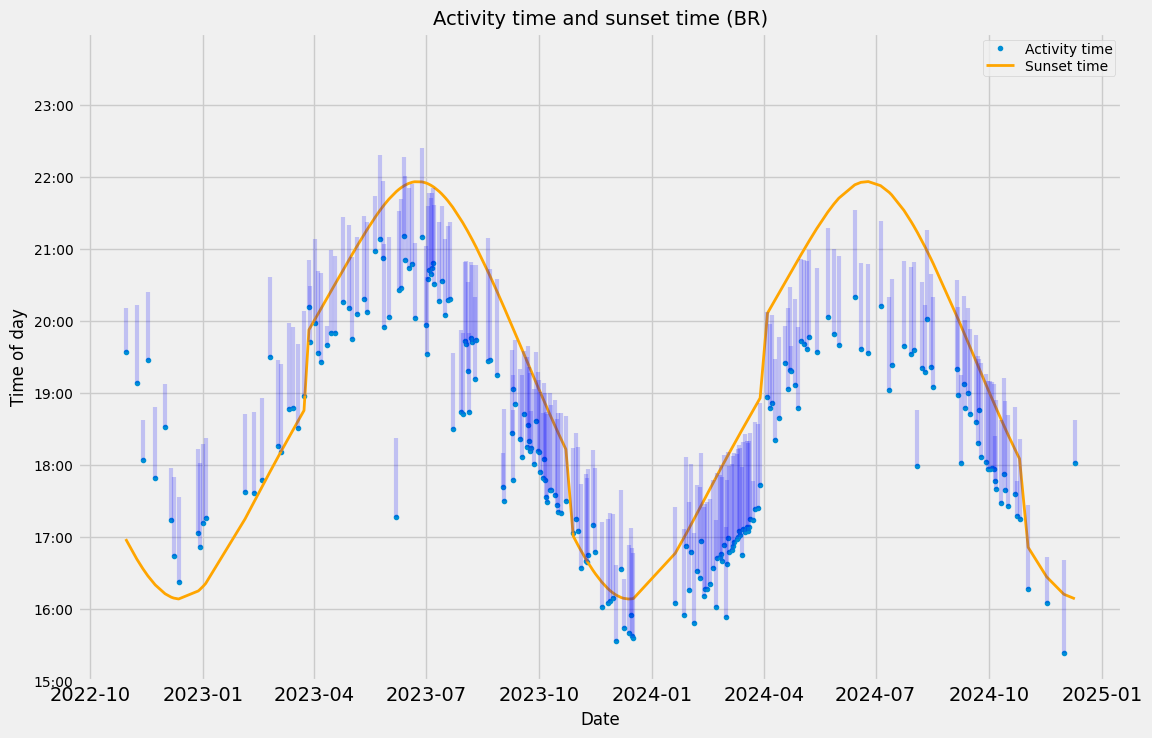

In [423]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the activity start time
ax.plot(br_merged_df.index, br_merged_df['Time_seconds'], 'o', markersize=3, label='Activity time')

# Plot the sunset time
ax.plot(br_merged_df.index, br_merged_df['Sunset_Time_Seconds'], label='Sunset time', color='orange', linewidth=2.0)

# Add vertical lines representing the duration of each activity
for idx, row in br_merged_df.iterrows():
    ax.vlines(x=idx, ymin=row['Time_seconds'], ymax=row['Time_seconds'] + row['Duration (seconds)'], color='blue',linewidth=3.0, alpha=0.2)

# Set y-axis ticks and labels
plt.yticks(range(15 * 3600, 24 * 3600, 3600), [f"{i:02}:00" for i in range(15, 24)], fontsize=10)
plt.gca().set_ylim(15 * 3600, 24 * 3600)

# # Set x-axis ticks and labels
# plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))

# Set labels and title
plt.xlabel("Date", fontsize=12)
plt.ylabel('Time of day', fontsize=12)
plt.title('Activity time and sunset time (BR)', fontsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=10, borderpad=0.2, labelspacing=0.2)

# Add grid
plt.grid(True)

# Show plot
plt.show()

In [428]:
combined_df

,Activity Id,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Duration (seconds),Average Pace (seconds),Time,Time_seconds,Sunset_Time,Sunset_Time_Seconds,Location
Date,,,,,,,,,,,,,,
2018-06-16,9116da41-8f3f-4d43-be98-543467311f65,4.95,48:54,9:53,6.07,423.0,112,2934,593,22:21:37,80497,19:11:36.772738,69096,SG
2018-06-17,05a6e5ef-41f4-44ba-bc5d-575c7306e614,5.32,52:31,9:53,6.07,457.0,118,3151,593,21:20:03,76803,19:11:50.075458,69110,SG
2018-06-24,cc2878b6-ed07-4e4b-9632-98041ce7ea40,5.41,51:43,9:34,6.28,479.0,137,3103,574,20:06:31,72391,19:13:21.389824,69201,SG
2018-07-08,076e4651-a03e-4daf-ab56-a31c90eb2db5,5.48,52:03,9:30,6.32,469.0,129,3123,570,21:05:30,75930,19:15:52.062192,69352,SG
2018-07-15,4b32b5a8-51c1-42e1-8a48-d6c4dd823d32,6.06,57:12,9:27,6.35,529.0,131,3432,567,20:07:34,72454,19:16:38.710916,69398,SG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-26,f39e4a9e-dd37-4f3a-8d7e-47cb259c5c4b,7.95,1:07:10,8:27,7.10,580.0,41,4030,507,17:14:17,62057,18:04:55.209944,65095,BR
2024-11-02,98b4b003-9d1c-4743-bd88-b19766453fdd,7.86,1:10:45,9:00,6.67,568.0,42,4245,540,16:15:58,58558,16:51:08.655170,60668,BR
2024-11-17,4f2886fd-f7b4-4ce6-bdde-823eeab292a3,3.85,38:12,9:56,6.04,285.0,15,2292,596,16:04:34,57874,16:26:32.305094,59192,BR


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create a combined dataframe for both SG and BR data
sg_merged_df['Location'] = 'SG'
br_merged_df['Location'] = 'BR'
combined_df = pd.concat([sg_merged_df, br_merged_df])

# Ensure the Date column is in datetime format
combined_df.index = pd.to_datetime(combined_df.index)

# Create the interactive plot
fig = px.scatter(combined_df, x=combined_df.index, y='Time_seconds', color='Location',
                 hover_data={'Time': True, 'Sunset_Time': True, 'Date': combined_df.index.to_series().dt.strftime('%d-%b-%y'), 'Time_seconds': False, 'Location': False},
                 labels={'index': 'Date'},
                 title='Activity time and sunset time (SG and BR)', width=1200, height=600)

# Add sunset time lines
# for location, df in combined_df.groupby('Location'):
#     fig.add_trace(go.Scatter(x=df.index, y=df['Sunset_Time_Seconds'], mode='lines', name=f'Sunset time ({location})'))

# Update y-axis ticks and labels
fig.update_yaxes(tickvals=list(range(0, 25 * 3600, 3600)), ticktext=[f"{i:02}:00" for i in range(0, 25)])

# Show the plot
fig.show()

In [456]:
# Create the figure
fig = go.Figure()

# Add scatter plot for Activity Time
fig.add_trace(go.Scatter(
    x=sg_merged_df.index,
    y=sg_merged_df['Time_seconds'],
    mode='markers',
    #marker=dict(size=5),
    name='Activity Time',
    text=sg_merged_df['Time'],
    customdata=sg_merged_df.index,
    hovertemplate='Date: %{customdata}<br>Activity Time: %{text}',
    marker=dict(size=5,color='blue')
))

# Add scatter plot for Sunset Time with lines and markers
fig.add_trace(go.Scatter(
    x=sg_merged_df.index,
    y=sg_merged_df['Sunset_Time_Seconds'],
    mode='lines+markers',
    name='Sunset Time',
    text=sg_merged_df['Sunset_Time'].apply(lambda x: str(x).split('.')[0]),
    customdata=sg_merged_df.index,
    hovertemplate='Date: %{customdata}<br>Sunset Time: %{text}',
    marker=dict(size=1,color='orange')
))

# Update layout
fig.update_layout(
    title='Activity Time and Sunset Time Across Dates',
    xaxis_title='Date',
    yaxis_title='Time of Day',
    yaxis=dict(
        tickformat='%H:%M',
        tickvals=[i * 3600 for i in range(24)],
        ticktext=[f'{i:02}:00' for i in range(24)]
    ),
    hovermode='closest'
)

# Show the plot
fig.show()

In [457]:
# Create the figure
fig = go.Figure()

# Add scatter plot for Activity Time
fig.add_trace(go.Scatter(
    x=br_merged_df.index,
    y=br_merged_df['Time_seconds'],
    mode='markers',
    #marker=dict(size=5),
    name='Activity Time',
    text=br_merged_df['Time'],
    customdata=br_merged_df.index,
    hovertemplate='Date: %{customdata}<br>Activity Time: %{text}',
    marker=dict(size=5,color='blue')
))

# Add scatter plot for Sunset Time with lines and markers
fig.add_trace(go.Scatter(
    x=br_merged_df.index,
    y=br_merged_df['Sunset_Time_Seconds'],
    mode='lines+markers',
    name='Sunset Time',
    text=br_merged_df['Sunset_Time'].apply(lambda x: str(x).split('.')[0]),
    customdata=br_merged_df.index,
    hovertemplate='Date: %{customdata}<br>Sunset Time: %{text}',
    marker=dict(size=1,color='orange')
))

# Update layout
fig.update_layout(
    title='Activity Time and Sunset Time Across Dates',
    xaxis_title='Date',
    yaxis_title='Time of Day',
    yaxis=dict(
        tickformat='%H:%M',
        tickvals=[i * 3600 for i in range(24)],
        ticktext=[f'{i:02}:00' for i in range(24)]
    ),
    hovermode='closest'
)

# Show the plot
fig.show()